In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sample = pd.read_csv('E://git仓库/my-master/InsuranceProject/2/sample_submission.csv')
train = pd.read_csv('E://git仓库/my-master/InsuranceProject/2/train.csv')
test = pd.read_csv('E://git仓库/my-master/InsuranceProject/2/test.csv')

In [4]:
train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [5]:
train.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381099,381100,Female,51,1,28.0,0,1-2 Year,Yes,44504.0,26.0,71,0
381100,381101,Female,29,1,28.0,0,< 1 Year,Yes,49007.0,124.0,137,0
381101,381102,Female,70,1,28.0,0,> 2 Years,Yes,50904.0,122.0,215,0
381102,381103,Female,25,1,41.0,1,< 1 Year,Yes,2630.0,152.0,102,0
381103,381104,Male,47,1,50.0,0,1-2 Year,Yes,39831.0,26.0,235,0
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [39]:
train.info()

<bound method DataFrame.info of         Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            0   44                1         28.0                   0   
1            0   76                1          3.0                   0   
2            0   47                1         28.0                   0   
3            0   21                1         11.0                   1   
4            1   29                1         41.0                   1   
...        ...  ...              ...          ...                 ...   
381104       0   74                1         26.0                   1   
381105       0   30                1         37.0                   1   
381106       0   21                1         30.0                   1   
381107       1   68                1         14.0                   0   
381108       0   46                1         29.0                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0             

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [8]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
missing_percentage = (train.isnull().sum() / len(train)) * 100
print(missing_percentage)

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64


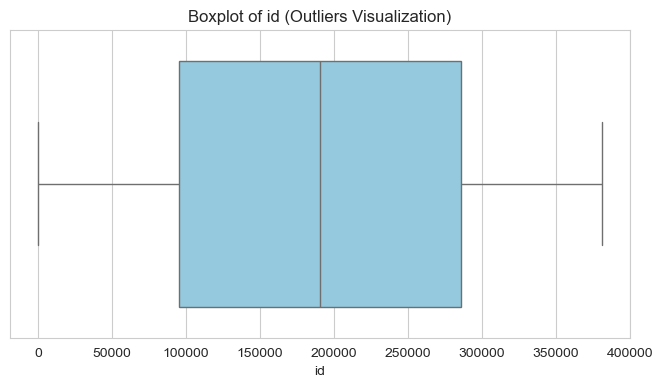

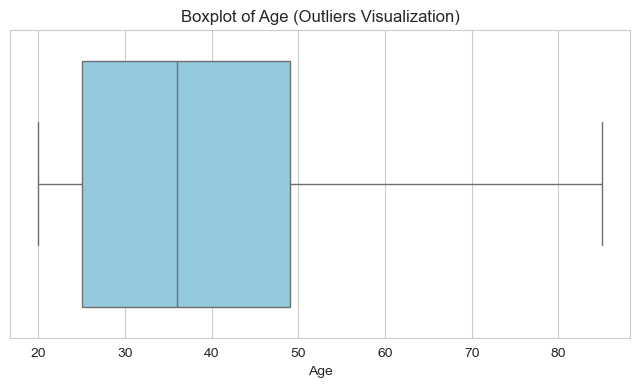

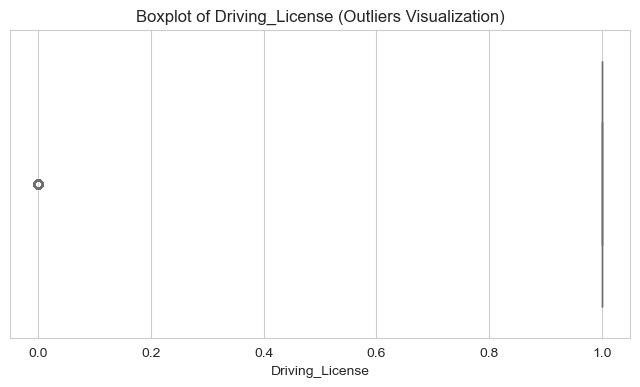

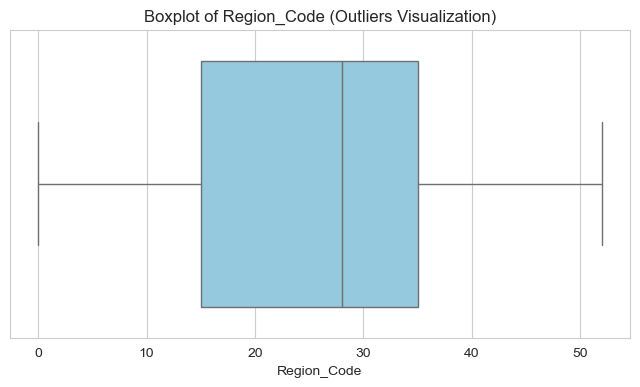

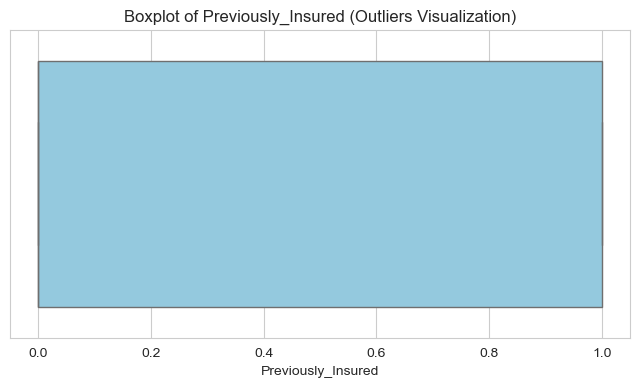

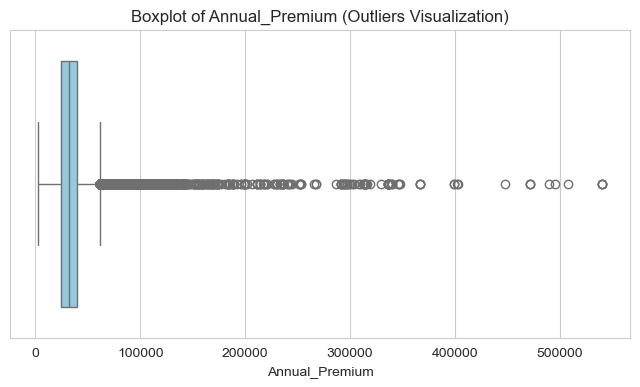

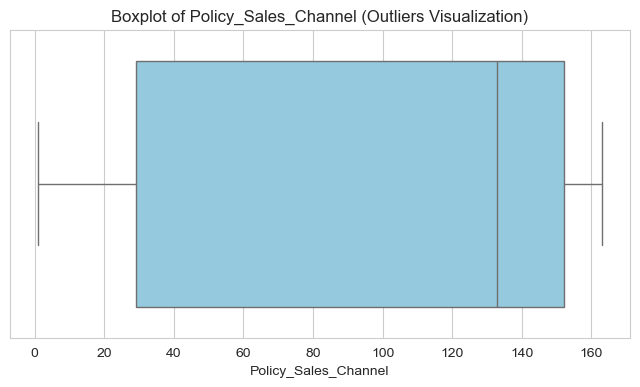

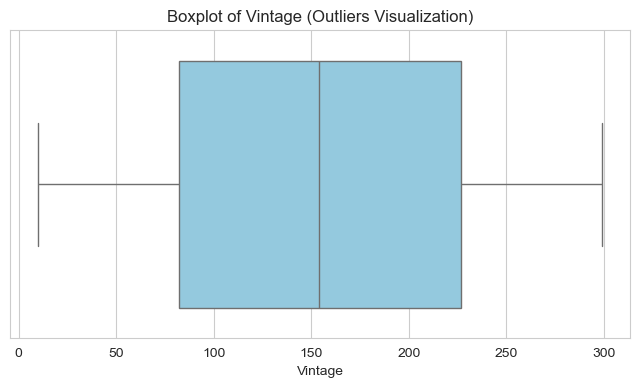

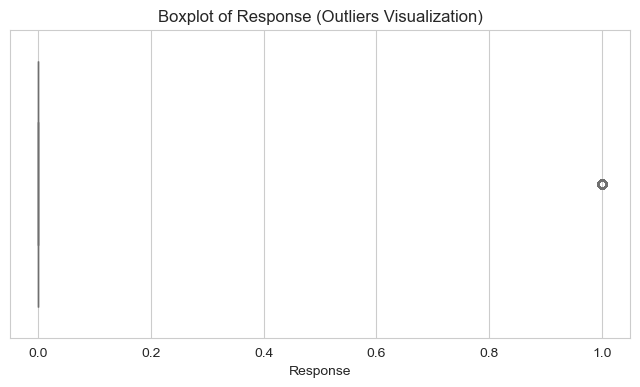

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numerical columns
def plot_outliers(train):
    numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=train[column], color="skyblue")
        plt.title(f"Boxplot of {column} (Outliers Visualization)")
        plt.xlabel(column)
        plt.show()

# Call the function to plot
plot_outliers(train)

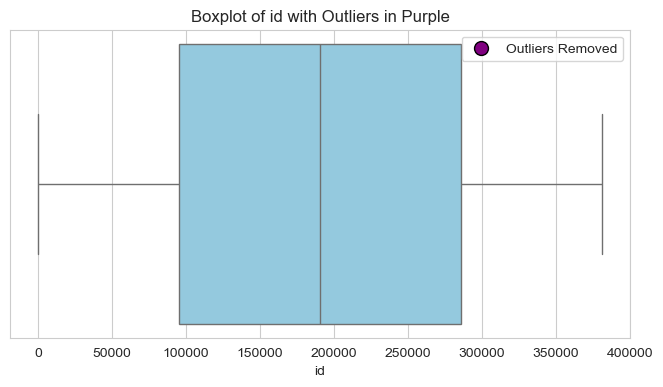

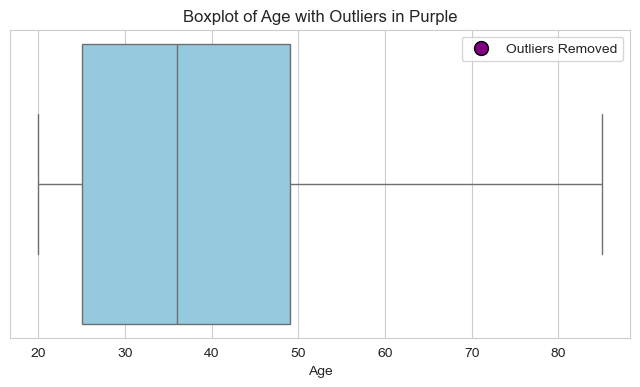

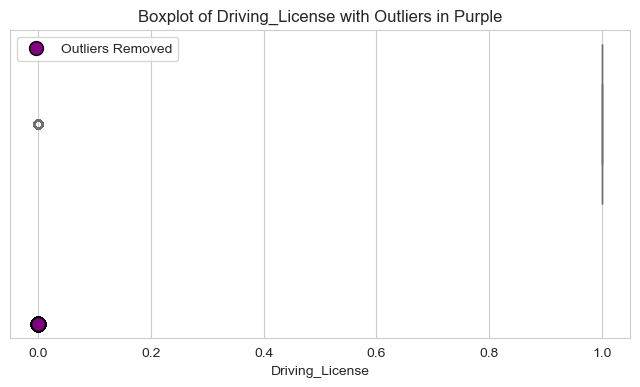

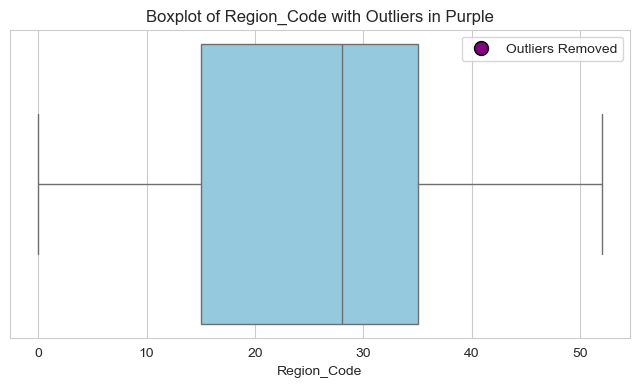

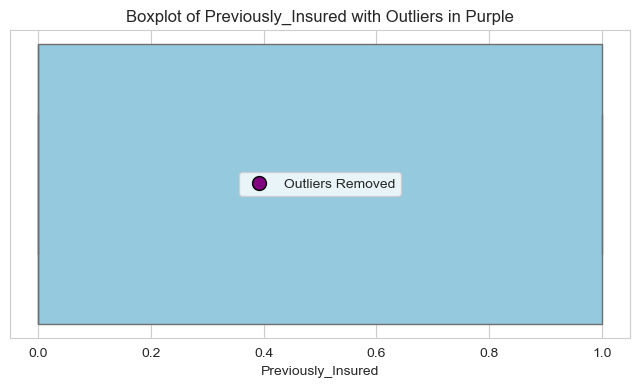

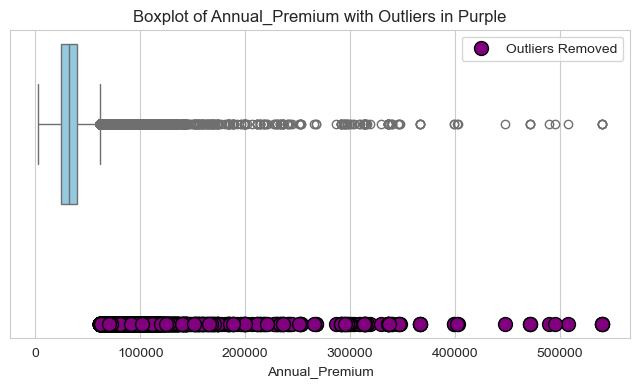

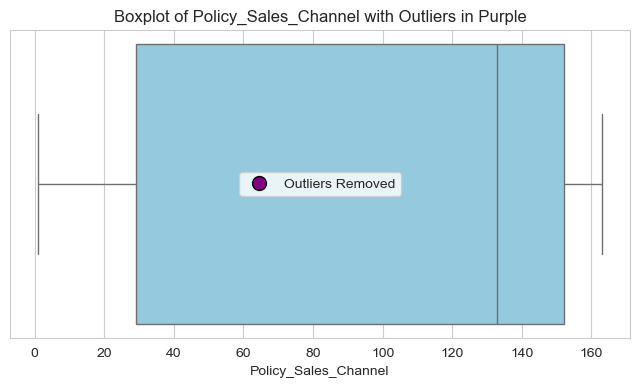

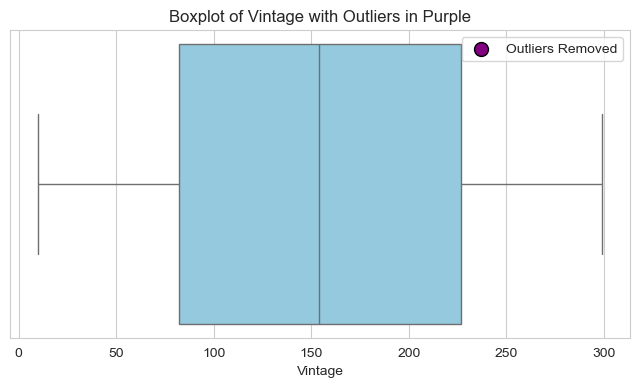

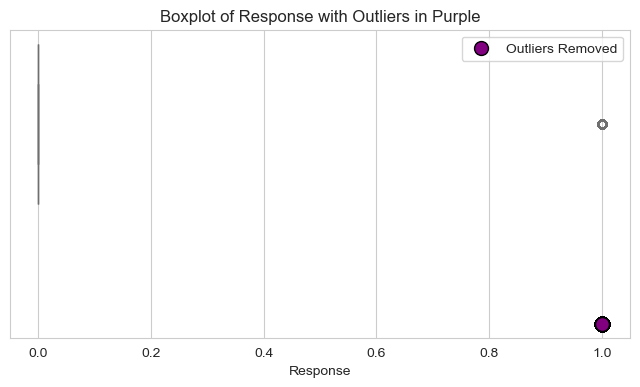

In [12]:
def remove_outliers_iqr(train):
    cleaned_data = train.copy()
    outlier_data = {}
    
    for column in train.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]
        outlier_data[column] = outliers
        
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    
    return cleaned_data, outlier_data

cleaned_data, outlier_data = remove_outliers_iqr(train)

def plot_outliers_with_removed(train, outlier_data):
    for column in train.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(8, 4))
        
        # Plot original boxplot without highlighting outliers
        sns.boxplot(x=train[column], color="skyblue", flierprops={'marker': 'o', 'color': 'blue'})
        
        # Highlight the removed outliers in purple
        if column in outlier_data:
            outliers = outlier_data[column]
            plt.scatter(outliers[column], [1] * len(outliers), color="purple", label="Outliers Removed", s=100, edgecolor='black')
        
        plt.title(f"Boxplot of {column} with Outliers in Purple")
        plt.xlabel(column)
        plt.legend()
        plt.show()

plot_outliers_with_removed(train, outlier_data)

In [13]:
train.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [14]:
## knowing all the unique value in the columns

train_unique = train.drop(columns = 'id')

for column in train_unique.columns:
    print(f"{column}: ")
    print("")
    print(train_unique[column].unique())
    print("")

Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

In [15]:
train.drop(columns = 'id', inplace = True)
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


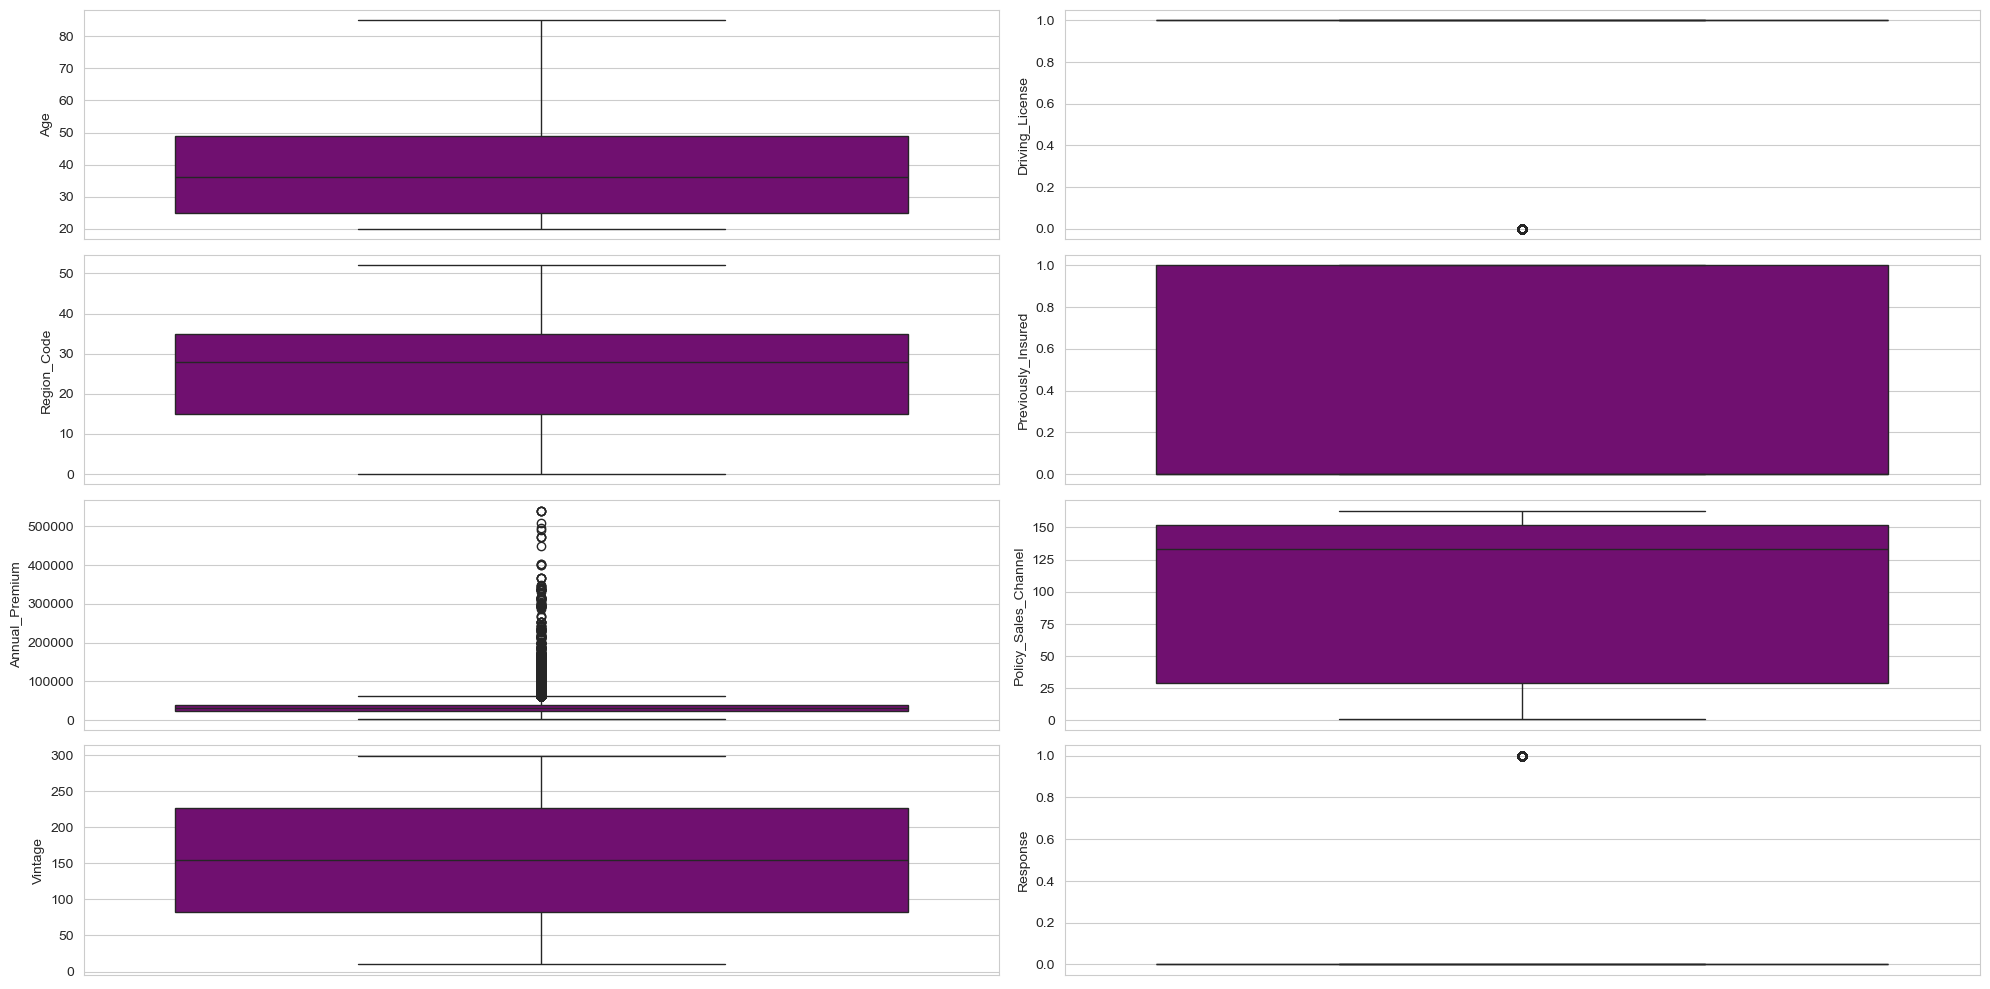

In [16]:
plt.figure(figsize = (20, 10))
x = 1

for column in train.describe().columns:
    plt.subplot(4,2, x)
    sns.boxplot(train[column], color='purple')
    x += 1

plt.tight_layout()
plt.show()

In [17]:
train['Gender'] = train['Gender'].map({'Female':1, 'Male':0})
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [18]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes':1, 'No':0})
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [19]:
train['Vehicle_Age'] = train['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [21]:
train['Gender'].value_counts()

Gender
0    206089
1    175020
Name: count, dtype: int64

In [22]:
pd.crosstab(index = train['Gender'], columns = train['Response'], normalize = 'index')

Response,0,1
Gender,,
0,0.861589,0.138411
1,0.896098,0.103902


In [23]:
pd.crosstab(index = train['Age'], columns = train['Response'], normalize = 'index')

Response,0,1
Age,,
20,0.972561,0.027439
21,0.965121,0.034879
22,0.963604,0.036396
23,0.963226,0.036774
24,0.964831,0.035169
...,...,...
81,0.928571,0.071429
82,0.965517,0.034483
83,0.954545,0.045455


In [24]:
pd.crosstab(index = train['Age'], columns = train['Response'], normalize = 'columns').sort_values(1, ascending = False)

Response,0,1
Age,,
44,0.019575,0.038771
43,0.019833,0.038643
45,0.019163,0.038000
46,0.018457,0.036545
42,0.019007,0.035346
...,...,...
81,0.000156,0.000086
82,0.000084,0.000021
83,0.000063,0.000021


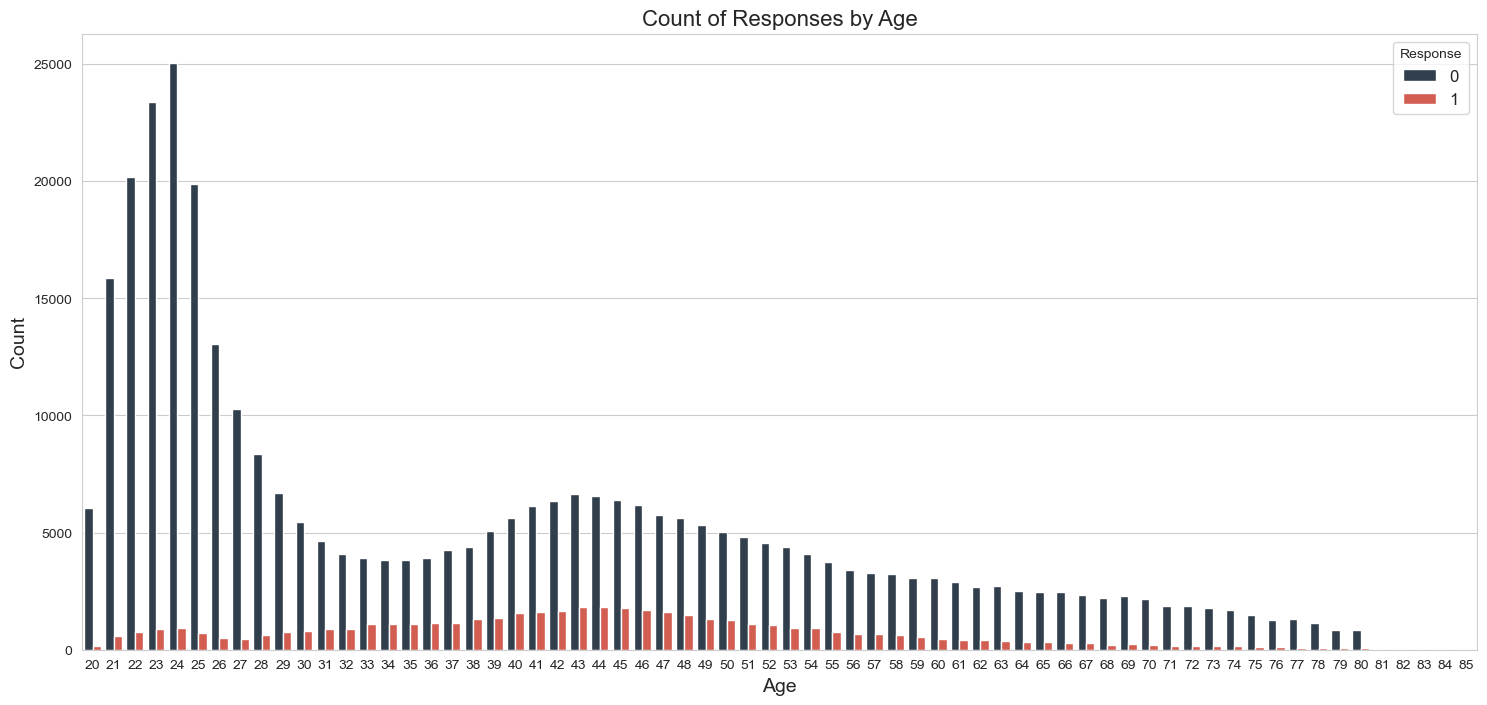

In [25]:
plt.figure(figsize=(18, 8))
custom_palette = ['#2c3e50', '#e74c3c']

sns.countplot(x='Age', hue='Response', data=train, palette=custom_palette)
plt.title('Count of Responses by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Response', fontsize=12)
plt.show()

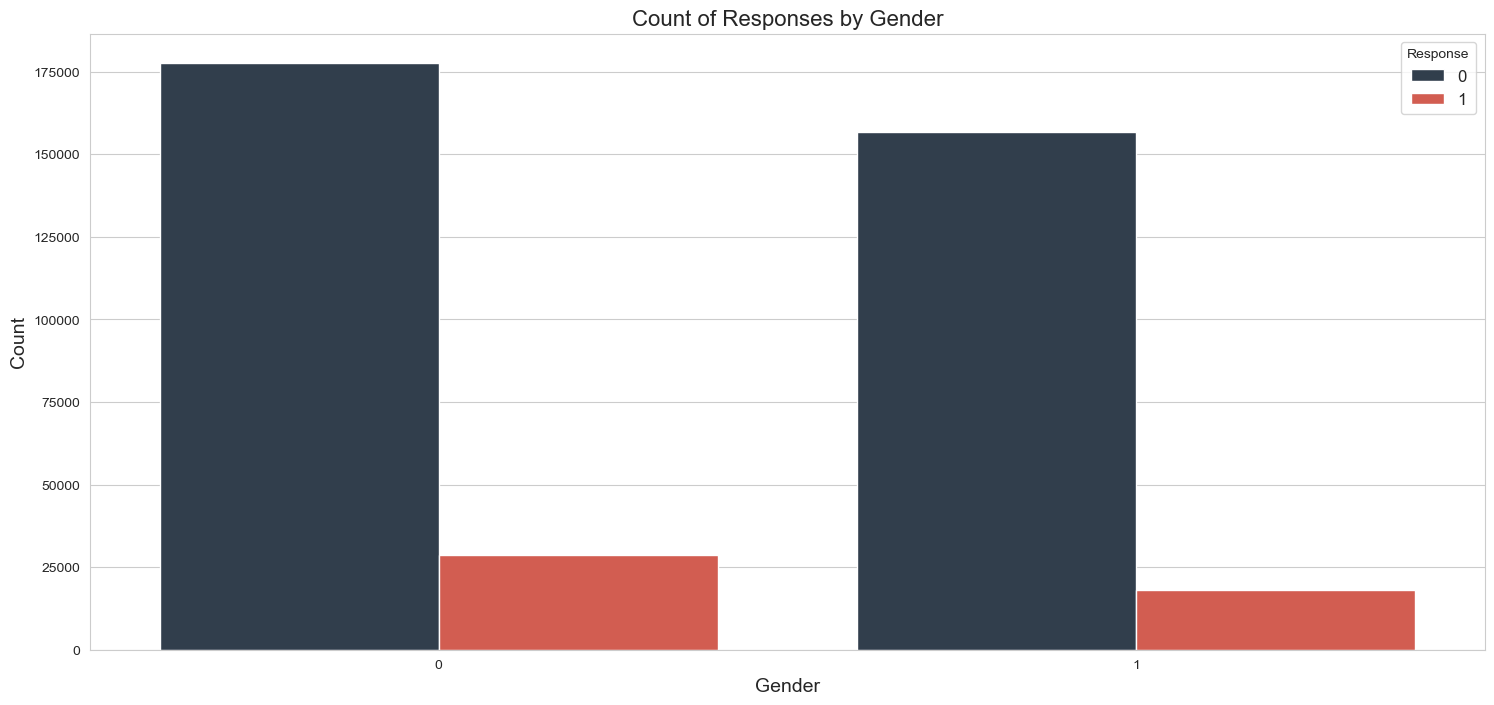

In [26]:
plt.figure(figsize=(18, 8))
custom_palette = ['#2c3e50', '#e74c3c']

sns.countplot(x='Gender', hue='Response', data=train, palette=custom_palette)
plt.title('Count of Responses by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Response', fontsize=12)
plt.show()


In [27]:
train['Driving_License'].value_counts(normalize= True)

Driving_License
1    0.997869
0    0.002131
Name: proportion, dtype: float64

In [28]:
pd.crosstab(index = train['Driving_License'], columns = train['Response'], normalize = 'index')

Response,0,1
Driving_License,,
0,0.949507,0.050493
1,0.877283,0.122717


In [29]:
pd.crosstab(index = train['Previously_Insured'], columns = train['Response'], normalize = 'index')

Response,0,1
Previously_Insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [30]:
pd.crosstab(index = train['Vehicle_Age'], columns = train['Response'], normalize = 'columns')

Response,0,1
Vehicle_Age,,
0,0.471245,0.154185
1,0.494948,0.745151
2,0.033807,0.100664


In [31]:
pd.crosstab(index = train['Response'], columns = 'Test', values = train['Annual_Premium'], aggfunc = 'median')

col_0,Test
Response,
0,31504.0
1,33002.0


C:\Users\123\AppData\Local\Temp\ipykernel_24952\169198481.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='Vehicle_Age', y='Response', hue='Vehicle_Damage', data=train, palette=custom_palette)


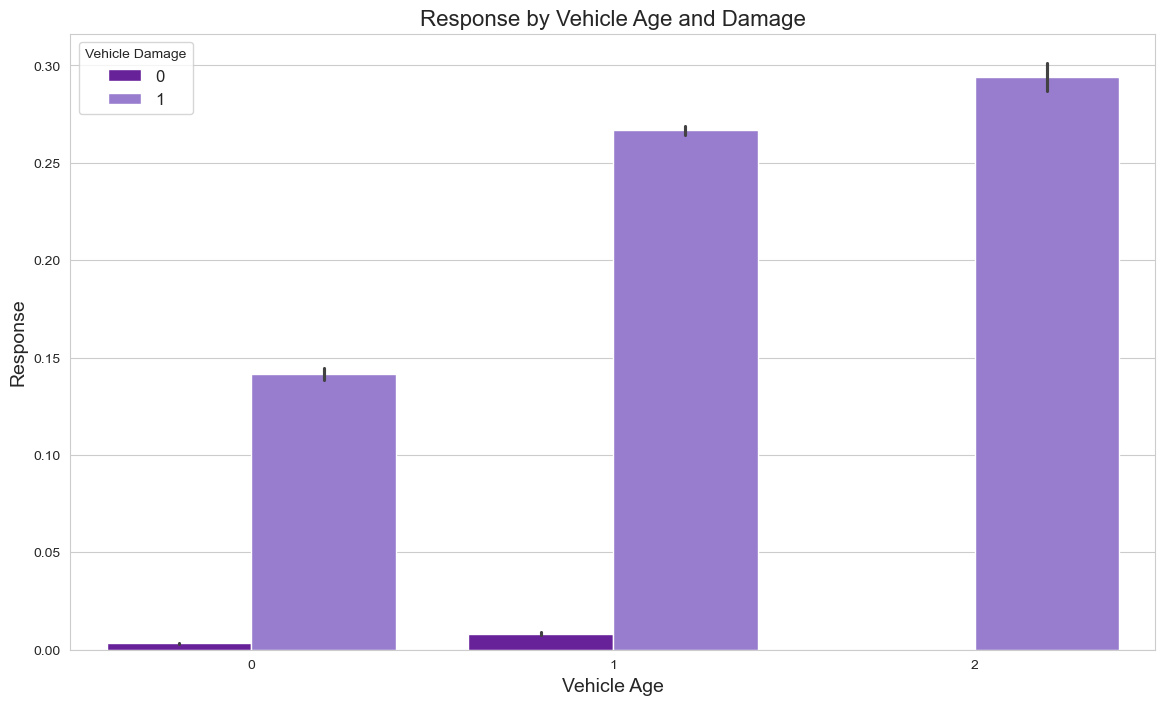

In [32]:
plt.figure(figsize=(14, 8))
custom_palette = ['#6a0dad', '#9370db', '#dda0dd']

sns.barplot(x='Vehicle_Age', y='Response', hue='Vehicle_Damage', data=train, palette=custom_palette)
plt.title('Response by Vehicle Age and Damage', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.legend(title='Vehicle Damage', fontsize=12)
plt.show()

<Axes: xlabel='Previously_Insured', ylabel='Response'>

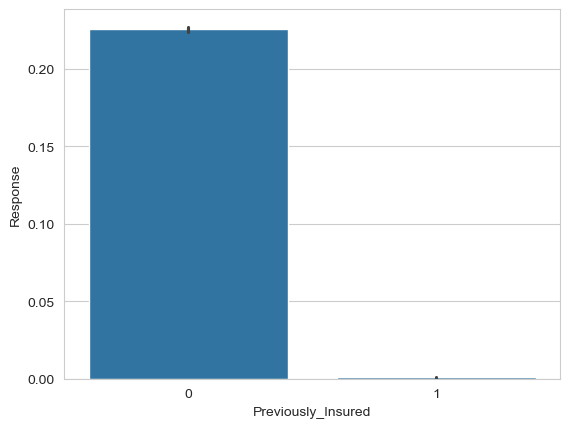

In [33]:
sns.barplot(x = train['Previously_Insured'], y = train['Response'])

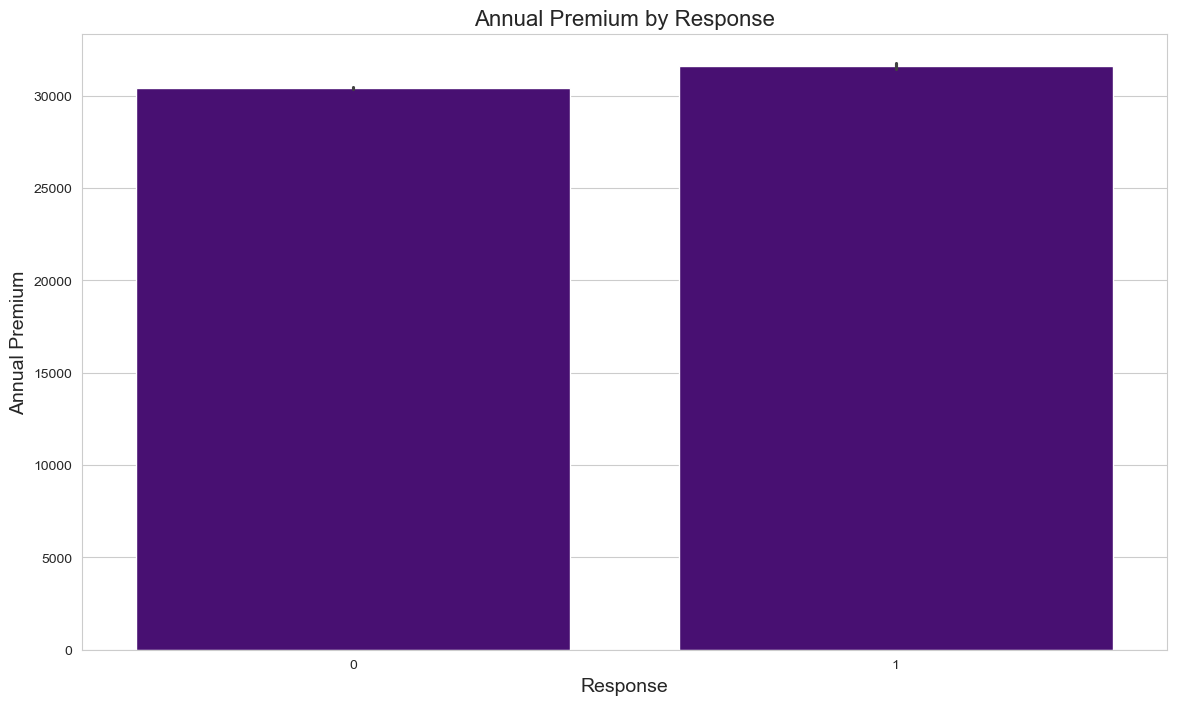

In [34]:
plt.figure(figsize=(14, 8))
blackberry_color = '#4B0082'

sns.barplot(x='Response', y='Annual_Premium', data=train, color=blackberry_color)
plt.title('Annual Premium by Response', fontsize=16)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.show()


In [35]:
train['Response'].value_counts(normalize = True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

<Axes: >

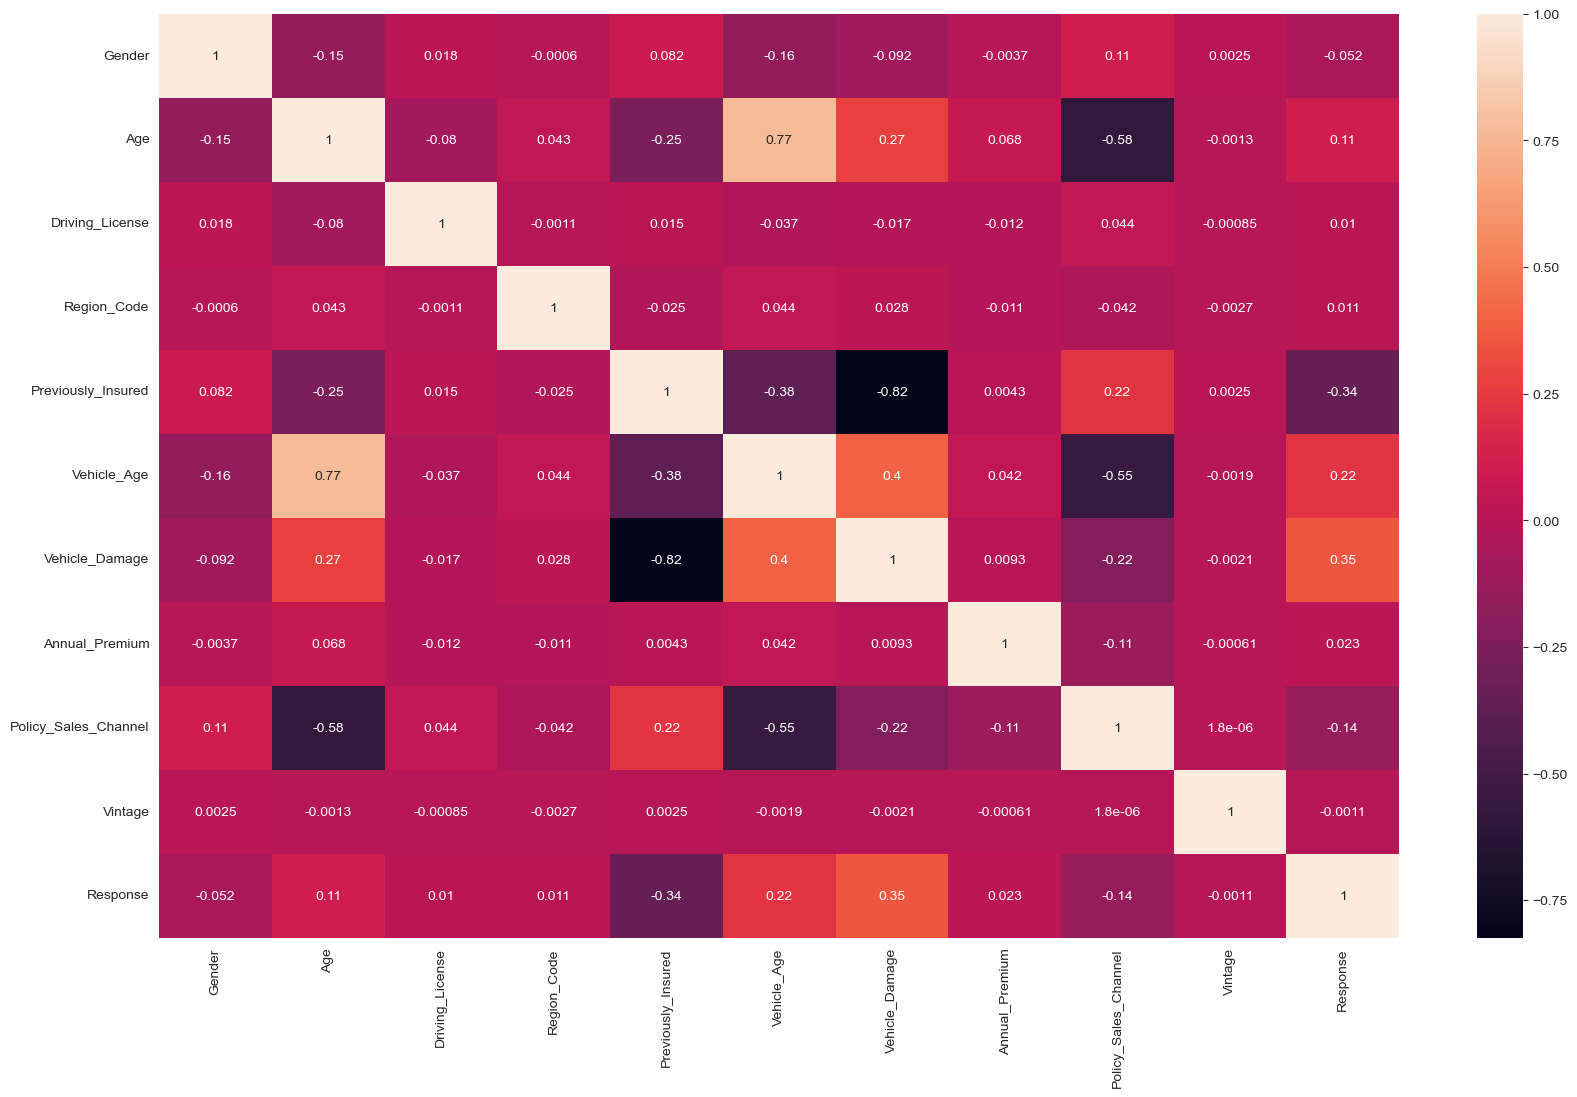

In [36]:
plt.figure(figsize = (20, 12))
sns.heatmap(train.corr(), annot = True)

In [37]:
correlation = train.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [38]:
X = train.drop(columns = [ 'Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'])
y = train['Response']